In [2]:
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt
import os
from parser import load_image
from plotter import plot_image

In [3]:
img = load_image('Add MS 7474_0013.tif')

In [4]:
labels = segmentation.slic(img, compactness=30, n_segments=3000)

In [5]:
label_rgb = color.label2rgb(labels, img, kind='overlay')

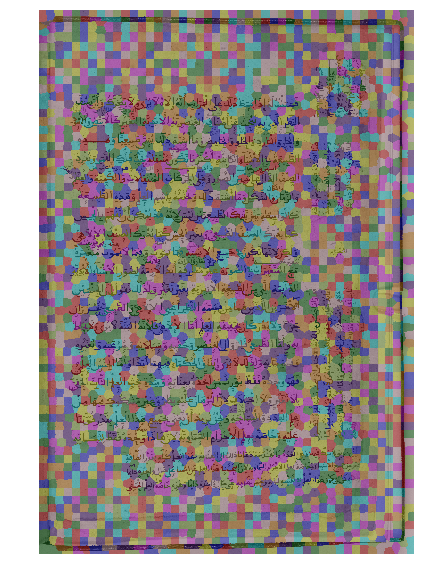

In [6]:
plot_image(label_rgb)

In [7]:
rag = graph.rag_mean_color(img, labels)

In [18]:
from skimage.measure import regionprops
regions = regionprops(labels)

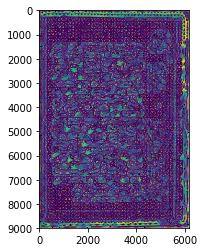

In [8]:
lc = graph.show_rag(labels, rag, label_rgb, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

In [13]:
labels2 = graph.cut_threshold(labels, rag, 5)

In [14]:
out2 = color.label2rgb(labels2, img)

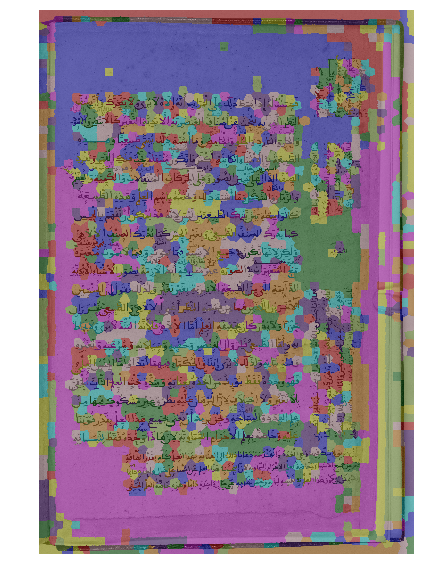

In [15]:
plot_image(out2)

In [25]:
for region in regions:
    rag.node[region['label']]['centroid'] = region['centroid']

In [23]:
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    for edge in g.edges():
        n1, n2 = edge
 
        r1, c1 = map(int, rag.node[n1]['centroid'])
        r2, c2 = map(int, rag.node[n2]['centroid'])
 
        line  = draw.line(r1, c1, r2, c2)
        circle = draw.circle(r1,c1,2)
 
        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        image[circle] = 1,1,0
 
    return image

In [26]:
import numpy as np
edges_drawn_all = display_edges(label_rgb, rag, np.inf )

KeyError: 'centroid'

In [ ]:
plo

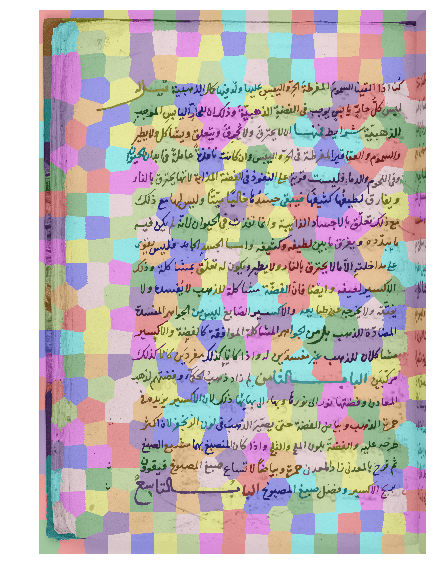

In [6]:
label_rgb = color.label2rgb(labels, img, kind='overlay')
plt.figure(figsize=(10,10))
plt.imshow(label_rgb)
plt.axis('off')
plt.show()

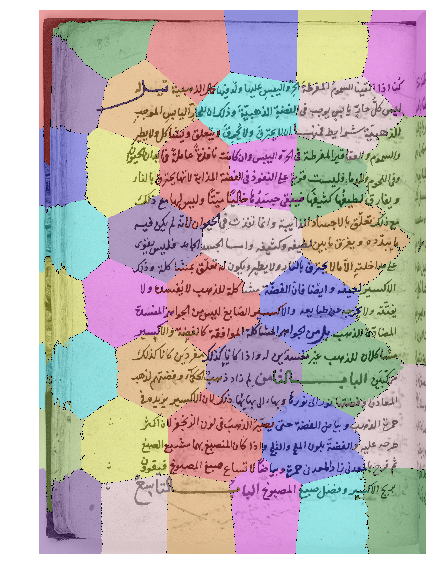

In [4]:
label_rgb = segmentation.mark_boundaries(label_rgb, labels, (0, 0, 0))
plt.figure(figsize=(10,10))
plt.imshow(label_rgb)
plt.axis('off')
plt.show()

In [7]:
gimg

array([[0.88335686, 0.88335686, 0.88055137, ..., 0.78809333, 0.7920149 ,
        0.7920149 ],
       [0.87551373, 0.8718749 , 0.86374902, ..., 0.79593647, 0.79118157,
        0.78809333],
       [0.87943529, 0.87971804, 0.86458235, ..., 0.79118157, 0.79229765,
        0.78445451],
       ...,
       [0.91027216, 0.91027216, 0.90663333, ..., 0.67001373, 0.67001373,
        0.66609216],
       [0.9105549 , 0.90746667, 0.91419373, ..., 0.67001373, 0.66720824,
        0.6593651 ],
       [0.90663333, 0.91419373, 0.91027216, ..., 0.67001373, 0.66692549,
        0.66692549]])

In [8]:
edges = filters.sobel(gimg)
edges_rgb = color.gray2rgb(edges)

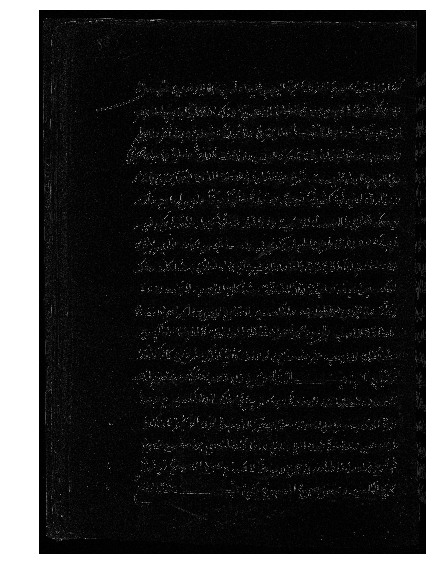

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
g = graph.rag_boundary(labels, edges)

In [13]:
regions = regionprops(labels)

NameError: name 'regionprops' is not defined

In [ ]:
plt.figure(figsize=(30,30))
lc = graph.show_rag(labels, g, img, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)
plt.axis('off')
plt.show()

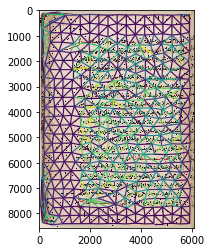

In [3]:
plt.figure(figsize=(30,30))
lc = graph.show_rag(labels, g, img, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

# plt.colorbar(lc, fraction=0.03)
plt.show()

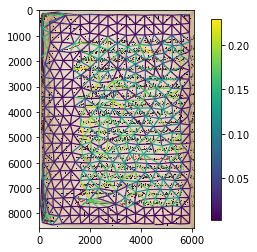

In [5]:
lc = graph.show_rag(labels, g, img, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)

plt.colorbar(lc, fraction=0.03)
plt.savefig('RAG.png')

In [ ]:
labels = segmentation.slic(img, compactness=100, n_segments=500)
g = graph.rag_boundary(labels, edges)
plt.figure(figsize=(20,20))
lc = graph.show_rag(labels, g, img, edge_cmap='viridis')
plt.colorbar(lc, fraction=0.03)
plt.show()

In [ ]:
labels

In [ ]:
segments_fz = segmentation.felzenszwalb(img, scale=100, sigma=0.5, min_size=50)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
from skimage.filters import try_all_threshold

In [ ]:
fig, ax = try_all_threshold(color.rgb2gray(img), figsize=(5,10), verbose=True)
plt.show()